# 2. Return values, macros, programs

Let's briefly recap what we covered last week and what you've practiced this week in [lab](lab1.md):

1. Importing data
2. Performing basic queries
3. Outputing some of your findings into .xlsx, .log, etc.

Today we'll build on these ideas:
1. String values as output
2. Numeric values embedded within a string
   - Using `macros`
3. Examples beyond .xlsx and .dta

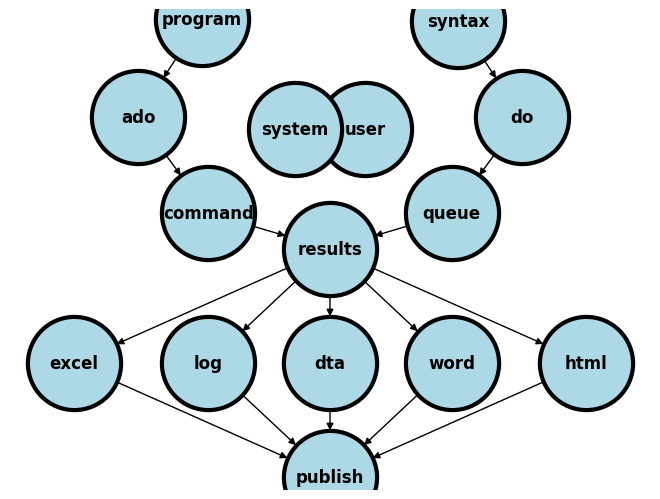

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

#### Results/Output
   + A sequence or queue of instructions `commands + syntax = code` given to Stata via a do-file will generate results  
   + <u>Never</u> include results in your do-file when you share your work in this class and with future collaborators
   + Due diligence in the `open-science` enterprise demands that others `reproduce` your results and findings
   + Your duty is to share <u>only</u> the `input`, and ours is to reproduce your `output` so as to fullfil our shared Credo 
   + Please share your do-files and any third-party ado-files, if at all your script or do-file relies on third-party programs      
       
#### Display/Files
   + .xlsx
   + .log
   + .dta
   + .docx
   + [.html](https://jhustata.github.io/livre/dyndoc.html)
   

## 2.1 xlsx

Import a datafile

```stata
use transplants, clear 
```

Use the `putexcel` command to create an Excel spreadsheet and name it "table1.xlsx"

```stata
putexcel set table1, replace
```

Populate the first row and first column with the text "Table 1. Demographic and clinical characteristics of kidney transplant recipients"

```stata
putexcel A1="Table 1. Demographic and clinical characteristics of kidney transplant recipients"
```

Now populate the second row and first column with the total number of observations in the `transplants.dta` dataset   

```stata
putexcel B1="N=`c(N)'"
```

Please engage with our new [Stata-focused community](https://github.com/jhufena/discussions/discussions), share what you know about the `putexcel` command, ask questions about this command, and contribute solutions to posted problems. 

Copy and paste the code snippet under the title "Sharing Code" into your `.do` file and run the script. Are you able to find your output?

If you get an error, it's likely that you did not edit the file path in the code. Always remember to adapt borrrowed code to your needs!


## 2.2 log

Let's input some Stata code into your .do file

```stata
log using chi2.log, replace //creates a .log file
use transplants, clear //imports the datafile
tab dx gender, row  chi2 //performs a chi-square test
log close //closes the .log file
```

Now lets find the content of the .log file created. When analyzing data in Stata, one often encounters the need to review or share results in a format that is both informative and easily interpretable. An essential step in this process involves examining the output stored in log-files. These files capture the essence of your analytical work, including statistical tests and their results. A common feature of interest in these results is the p-value, a metric that helps us understand the significance of our findings.

```stata
. tab dx gender, row  chi2

+----------------+
Key            
------------------
frequency    
row percentage 
+----------------+

Primary            gender
Diagnosis      |    0    |    1	    | Total
---------------+---------+----------+------			
1=Glomerular   |  237    |    187   |	 424 
               |  55.90  |   44.10  | 100.00 
---------------+---------+----------+------			
2=Diabetes     | 60      |  37	    | 97 
               | 61.86   |  38.14   | 100.00 
---------------+---------+----------+------			
3=PKD          | 81      |  66	    | 147 
               | 55.10   |  44.90   | 100.00 
---------------+---------+----------+------			
4=Hypertensive | 316     |  176	    | 492 
               | 64.23   |  35.77   | 100.00 
---------------+---------+----------+------		
5=Renovascular | 24      |  15	    | 39 
               | 61.54   |  38.46   | 100.00 
---------------+---------+----------+------			
6=Congenital   | 46      |  22	    | 68 
               | 67.65   |  32.35   | 100.00 
---------------+---------+----------+------				
7=Tubulo       | 32      |  35	    | 67 
               | 47.76   |  52.24   | 100.00 
---------------+---------+----------+------			
8=Neoplasm     | 8       |  5	    | 13 
               | 61.54   |  38.46   | 100.00 
---------------+---------+----------+------			
9=Other        | 421     |  232	    | 653 
               | 64.47   |  35.53   | 100.00 
---------------+---------+----------+------			
Total          | 1,225   |  775     | 2,000 
               | 61.25   |  38.75   | 100.00 

Pearson chi2(8) =  18.4805	Pr	= 0.018

. 

```

To start, let's consider the `return list` command:

```stata
return list
```

This command is your gateway to reviewing the most recent test results stored by Stata. It lists out all the statistics calculated by the last command, including the number of observations (`r(N)`), test statistics like chi-squared values (`r(chi2)`), and crucially, the p-value (`r(p)`).

However, simply listing out the p-value isn't always enough, especially when preparing your findings for a broader audience, such as in peer-reviewed publications. The reporting of p-values follows specific conventions to enhance clarity and understanding. Let's explore how to apply these conventions using a conditional formatting approach:

### 2.2.1 Introduction to the "quietly" Command

The first block introduces the concept of running commands 'quietly' in Stata, which suppresses the output in the Results window.

```stata
qui {
    // Your Stata commands here
} 
```

- `qui {`: This command is short for 'quietly'. It tells Stata to execute the commands within the braces without displaying the usual output in the Results window. It's helpful for keeping your results clean or when you're only interested in the final outcome rather than seeing every step.
- `}`: This closing brace marks the end of the 'quietly' section. After this point, Stata will return to its default behavior, which is to display output for each command.

### 2.2.2 Handling p-values Less Than 0.01

The second block explains how to handle cases where p-values are less than 0.01.

```stata
qui {
    if r(p) < 0.01 {
        local p: di "p < 0.01"
    }
}
```

- `if r(p) < 0.01 {`: This line checks if the p-value (`r(p)`) from the last statistical test is less than 0.01. If true, the commands inside the braces will execute.
- `local p: di "p < 0.01"`: Here, if the condition is met, we assign a formatted string "p < 0.01" to a local macro named `p`. This is a concise way to communicate that the test results are highly significant.

### 2.2.3 Formatting p-values Between 0.01 and 0.05

The third block focuses on p-values that fall between 0.01 and 0.05, using precision formatting.

```stata
qui {
    else if inrange(r(p),0.01,0.05) {
        local p: di %3.2f r(p)
    }
}
```

- `else if inrange(r(p),0.01,0.05) {`: This line checks if the p-value is within the specified range. The `inrange()` function is versatile, allowing for clear boundary definitions.
- `local p: di %3.2f r(p)`: For p-values in this range, we format the number to have two decimal places (e.g., 0.03), ensuring clarity and precision in our reporting.

### 2.2.4 Formatting p-values Greater Than 0.05

The fourth block deals with formatting p-values greater than 0.05.

```stata
qui {
    else {
        local p: di %2.1f r(p)
    }
}
```

- `else {`: This part catches any cases not previously covered, essentially p-values greater than 0.05.
- `local p: di %2.1f r(p)`: Here, we format the p-value to have one decimal place, indicating a less strict interpretation of statistical significance.

### 2.2.5 Combining Everything

Finally, we combine all the parts into a cohesive whole, demonstrating how to format p-values based on their value, all within a 'quietly' block.

```stata
qui { //asks Stata to work "quietly", until the corresponding brace is closed at the end
    if r(p) < 0.01 {
       local p: di "p < 0.01"
    }
    else if inrange(r(p),0.01,0.05) {
       local p: di %3.2f r(p)
    }
    else {
       local p: di %2.1f r(p)
    }
    noi di "p = `p'"
} //after this brace Stata may return to its default: "noisely" produce output as it runs the program
```

- This final block puts everything together, showing how to use `qui` to suppress unnecessary output while precisely formatting p-values according to their significance level. The `noi di "p = `p'`" line then displays the formatted p-value, completing the explanation of how to communicate statistical results clearly and effectively.

### 2.2.6 Recap of the chi-square test

In this script, we start by checking if the p-value is less than 0.01. If so, we report it as "p < 0.01" to indicate a very high level of statistical significance. This convention signals to the reader that the result is significant beyond the conventional thresholds.

If the p-value falls between 0.01 and 0.05, we report it in a standard numeric format (e.g., 0.03), maintaining two decimal places for precision. This range indicates statistical significance at the conventional 5% level, which is widely accepted in many research disciplines.

For p-values greater than 0.05, we format them with one decimal place, acknowledging that while the result may not meet the conventional threshold for statistical significance, it is still worth reporting for a comprehensive understanding of the analysis.

This approach to formatting and reporting p-values is not just about following academic conventions; it's about making your results clear and interpretable for your audience, facilitating better understanding and discussion of your research findings.

In practice, here's how the output might look after applying our formatting script:

```stata
. return list 

scalars:
r(N) =  2000
r(r) =  9
r(c) =  2
r(chi2) =  18.48047641017726
r(p) =  .0178990677414798

. qui {
p = 0.02
```

Notice how the p-value is processed and reported as "0.02" to fit the specified format for p-values between 0.01 and 0.05. This precision in reporting underscores the importance of statistical details in the broader narrative of your research findings.


[chi2.log](https://raw.githubusercontent.com/jhustata/livre/main/chi2.log)

## 2.3 dta

**Step 1: Clearing the Workspace**

```stata
cls
clear 
postutil clear 
```

- `cls`: Clears the Stata command window, providing a clean slate for your next commands. It's a good practice to start with this to avoid confusion from previous outputs.
- `clear`: Removes all data from memory. This ensures that the workspace is clean before starting new data manipulations.
- `postutil clear`: Clears any existing posted datasets from memory. This is particularly useful when you're about to create new posted datasets, ensuring no conflicts or errors arise from previous sessions.

**Step 2: Setting Up a New Posted File**

```stata
postfile pp str80 a float(b c) using output.dta, replace 
```

- `postfile pp str80 a float(b c) using output.dta, replace`: This line initiates the creation of a new dataset (`output.dta`) with specific variables `a`, `b`, and `c`. Here, `pp` is the name given to this posting session, `str80 a` defines `a` as a string variable with a maximum length of 80 characters, and `float(b c)` defines `b` and `c` as floating-point numbers. The `replace` option allows overwriting any existing file with the same name, ensuring that your new data is saved without issues.

**Step 3: Populating the Dataset**

```stata
post pp ("1") (24.4) (123)
post pp ("2") (31.5) (164)
post pp ("3") (29.0) (118)
```

- These lines use the `post` command to add records to the dataset you've started. Each `post` command adds a new row with the specified values for `a`, `b`, and `c`. For example, `post pp ("1") (24.4) (123)` adds a row with `a` as "1", `b` as 24.4, and `c` as 123.

**Step 4: Finalizing the Dataset**

```stata
postclose pp
```

- `postclose pp`: This command closes the posting session named `pp`, finalizing the dataset. After this, no more data can be added to `output.dta` under this posting session.

**Step 5: Using and Viewing the Dataset**

```stata
use output, clear 
list 
```

- `use output, clear`: Loads the newly created `output.dta` into memory, clearing any other data that was previously loaded. This makes `output.dta` the active dataset for analysis.
- `list`: Displays the contents of the active dataset in the Results window. This provides a quick way to review the data you've just posted, ensuring it looks as expected.



## 2.4 docx

We may embed Stata results in a .docx file in two very distinct ways:
   + putdocx
   + dyndoc

### 2.4.1. Putdocx

+ putdocx begin (Tell Stata you want to create a Word doc)
+ putdocx text etc. (Define the contents of the Word doc you will create)
+ putdocx save (Actually create the Word doc and write it to disk)


```stata
putdocx clear
putdocx begin
putdocx paragraph
putdocx text ("How to embed Stata results in .docx")
putdocx paragraph
putdocx text ("Author, MD MPH")
putdocx paragraph
putdocx text ("Background. A user downloads and installs a system of program files, mostly ado-files, which form the foundation of most of the commands used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed in the results window, in a graph, or in a format (.xlsx, .log, .dta, .docx, .md, LaTeX, .html, etc). The .docx file format is of specific interest to us right now. To illustrate how this may be achieved in Stata, we hereby introduce the putdocx command.")
putdocx paragraph
putdocx text ("Methods. We created a do-file and populated it with this abstract using plain text. Results that might be numeric, string, alphanumeric, or formatted as macros are manually embeded in the text. We then saved this document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). In the key analysis, Y = b0 + b1X, where Y is life expectancy at birth in years, the outcome or dependent variable; X is the country, the predictor or independent variable being tested.")
putdocx paragraph
putdocx text ("Results. We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, b0, was 72 years. Difference in life expectancy among adjacent countries, b1, showed no trend or pattern and was 0.002 year, essentially zero, and p=0.95")
putdocx paragraph
putdocx text ("Conclusion. In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in .html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results in .xlsx, .log, .dta, .docx, etc.")
putdocx save myfirst.docx, replace
```


       
      
Author, MD MPH        
      
Background. A user downloads and installs a system of program files, mostly ado-files, which form the foundation of most of the commands used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates well-formed instruction to Stata called a do- file script. Once the user runs this script, results are generated and displayed in the results window, in a graph, or in a format (.xlsx, .log, .dta, .docx, .md, LaTeX, .html, etc). The .docx file format is of specific interest to us right now. To illustrate how this may be achieved in Stata, we hereby introduce the putdocx command.     
     
Methods. We created a do-file and populated it with this abstract using plain text. Results that might be numeric, string, alphanumeric, or formatted as macros are manually embeded in the text. We then saved this document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). In the key analysis, Y = b0 + b1X, where Y is life expectancy at birth in years, the outcome or dependent variable; X is the country, the predictor or independent variable being tested.     
     
Results. We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, b0, was 72 years. Difference in life expectancy among adjacent countries, b1, showed no trend or pattern and was 0.002 year, essentially zero, and p=0.95     
     
Conclusion. In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in .html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results in .xlsx, .log, .dta, .docx, etc.     

### 2.4.2. dyndoc
   + Identical to the .html approach discussed in the next section
   + But has some caveats that we will discuss
   + Word documents are not able to render LaTeX format



#### Author, MD MPH

**Background:** 
A <u>user</u> downloads and installs a <u>system</u> of program files, mostly ado-files, which form the foundation of most of the commands 
used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates 
well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed
in the results window, in a graph, or in a format (`.xlsx`, `.log`, `.dta`, `.docx`, `.md`, `LaTeX`, `.html`, etc). The `.docx` file format is of specific 
interest since its the one of the most widely used word processors. To illustrate how this may be achieved in Stata, we hereby introduce the `dyndoc`
command. 

**Methods:** 
We created a [do-file](https://raw.githubusercontent.com/jhustata/livre/main/filename.do) and populated it with this abstract using [markdown](https://en.wikipedia.org/wiki/Markdown) language. Anything 
in this document that is not ordinary text including `<<dd_version: 2>>`, `<<dd_do:nooutput>>`, `<</dd_do>>`, `<<dd_display: c(N)>>` is a 
[markup](https://en.wikipedia.org/wiki/Markup_language#:~:text=A%20markup%20language%20is%20a,content%20to%20facilitate%20automated%20processing.). 
Results that might be numeric, string, alphanumeric, or formatted as macros are embeded at these markedup points. We then saved this 
document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). To the `pwd` where we saved
this text file, we added a cascading style sheet [stmarkdown.css](https://raw.githubusercontent.com/jhustata/livre/main/stmarkdown.css) and [header.txt](https://raw.githubusercontent.com/jhustata/livre/main/header.txt) to enhance the aesthetic of our .html file. Finally, we typed the 
following command into the Stata command window: `dyndoc filename.do, saving(filename.docx) replace`. In the key analysis, $Y  = \beta_0   +  \beta_1 X$, where $Y$ is life expectancy at birth in years, the outcome or dependent variable; $X$ is the country, the predictor or independent variable being tested.  

```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. quietly sum lexp

. qui local lexp_mean: di %3.0f r(mean) 

. quietly sum Country

. qui local Country_mean: di r(mean)  

. twoway scatter lexp Country, ///
>    xscale(off) ///
>    yline(`lexp_mean', ///
>       lc(red) ///
>       lp(dash) ///
>    ) ///
>    text(`lexp_mean' `Country_mean' "Mean life expectancy among countries")

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 
end of do-file

. 

```

![](lexp_bycountry.png)
      
  
```stata
. qui {

.

```

```stata
. display c(N) 
68

. display c(k)  
6

. list in 1/5  

						
    region	            country	    popgro~h	 lexp	    gnppc  safewa~r	
						
1.  Europe & C. Asia	Albania	       1.2	        72	    810	    76	
2.  Europe & C. Asia	Armenia	       1.1	        74	    460	    .	
3.  Europe & C. Asia	Austria	       .4	        79	    26830   .	
4.  Europe & C. Asia	Azerbaijan    1.4	        71	    480	    .	
5.  Europe & C. Asia	Belarus	       .3	        68	    2180    .	
						

. 
end of do-file

. 

```

**Results:** 
We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that
we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted
results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, $\beta_0$, was 72 years. Difference in life expectancy among <u>adjacent</u> countries, $\beta_1$, showed no trend or pattern and was 0.002 year, essentially $zero$, and $p = .95$

**Conclusions:** 
In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in
.html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results 
in .xlsx, .log, .dta, .docx, etc. 





## 2.5 html

### 2.5.1. How to embed Stata results in .html  

### Author, MD MPH

**Background:** 
A <u>user</u> downloads and installs a <u>system</u> of program files, mostly ado-files, which form the foundation of most of the commands 
used in Stata Programming. Using those commands and additional syntax written out sequentially in a do-file, the user creates 
well-formed instruction to Stata called a do-file script. Once the user runs this script, results are generated and displayed
in the results window, in a graph, or in a format (`.xlsx`, `.log`, `.dta`, `.docx`, `.md`, `LaTeX`, `.html`, etc). The `.html` file format is of specific 
interest since its the pathway to self-publication. To illustrate how this may be achieved in Stata, we hereby introduce the `dyndoc`
command. 

**Methods:** 
We created a [do-file](https://raw.githubusercontent.com/jhustata/livre/main/filename.do) and populated it with this abstract using [markdown](https://en.wikipedia.org/wiki/Markdown) language. Anything 
in this document that is not ordinary text including `<<dd_version: 2>>`, `<<dd_do:nooutput>>`, `<</dd_do>>`, `<<dd_display: c(N)>>` is a 
[markup](https://en.wikipedia.org/wiki/Markup_language#:~:text=A%20markup%20language%20is%20a,content%20to%20facilitate%20automated%20processing.). 
Results that might be numeric, string, alphanumeric, or formatted as macros are embeded at these markedup points. We then saved this 
document using the file extension .do; however, any text file extension will work (.txt, .md, .do, etc). To the `pwd` where we saved
this text file, we added a cascading style sheet [stmarkdown.css](https://raw.githubusercontent.com/jhustata/livre/main/stmarkdown.css) and [header.txt](https://raw.githubusercontent.com/jhustata/livre/main/header.txt) to enhance the aesthetic of our .html file. Finally, we typed the 
following command into the Stata command window: `dyndoc filename.do, saving(filename.html) replace`. In the key analysis, $Y  = \beta_0   +  \beta_1 X$, where $Y$ is life expectancy at birth in years, the outcome or dependent variable; $X$ is the country, the predictor or independent variable being tested.  

```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. quietly sum lexp

. qui local lexp_mean: di %3.0f r(mean) 

. quietly sum Country

. qui local Country_mean: di r(mean)  

. twoway scatter lexp Country, ///
>    xscale(off) ///
>    yline(`lexp_mean', ///
>       lc(red) ///
>       lp(dash) ///
>    ) ///
>    text(`lexp_mean' `Country_mean' "Mean life expectancy among countries")

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 
end of do-file

. 

```

![](lexp_bycountry.png)
      
  
```stata
. qui {

.

```

```stata
. display c(N) 
68

. display c(k)  
6

. list in 1/5  

						
    region	            country	    popgro~h	 lexp	    gnppc  safewa~r	
						
1.  Europe & C. Asia	Albania	       1.2	        72	    810	    76	
2.  Europe & C. Asia	Armenia	       1.1	        74	    460	    .	
3.  Europe & C. Asia	Austria	       .4	        79	    26830   .	
4.  Europe & C. Asia	Azerbaijan    1.4	        71	    480	    .	
5.  Europe & C. Asia	Belarus	       .3	        68	    2180    .	
						

. 
end of do-file

. 

```

**Results:** 
We identified the newly created .html file in our folder and opened it to compare its format to this markdown file. And we saw all that
we had made, and behold, it was very good. Ghastly macros in the original markdown language now appeared as neatly formatted
results. There were 68 observations and 6 observations in the analyzed dataset. Average life expectancy of all countries, $\beta_0$, was 72 years. Difference in life expectancy among <u>adjacent</u> countries, $\beta_1$, showed no trend or pattern and was 0.002 year, essentially $zero$, and $p = .95$

**Conclusions:** 
In walking you through syntax, do-file creation, queued commands, generated results, through to embedding neatly formatted output in
.html, we believe you now have a solid sense of all that Stata has to offer you. These ideas can be generalized to embedding results 
in .xlsx, .log, .dta, .docx, etc. 

## 2.6 Lab

We'll revise the questions you discussed in [lab 1](lab1.md), and incorporate our new knowledge about macros and conditional statements

## 2.6 Homework

Your week 2 homework is nearly as simple as that from week 1:
1. Write a .do file which imports data from [hw1.txt](https://jhustata.github.io/book/_downloads/884b9e06eb29f89b1b87da4eab39775d/hw1.txt)
2. Name it `hw2.lastname.firstname.do`
3. It should create a .log file called `hw2.lastname.firstname.log`
4. Make sure your log file displays only the output of interest
5. But do not submit your log file as part of the assignment
6. Evaluation will be based on the .log file produced when we run your script on our machines


Questions

**Question 1**. Print the following sentence: `Question 1: The median [IQR] age is XX [XX-XX] among males and XX [XX-XX] among females.` IQR stands for interquartile range. The `XX` values should be replaced with correct values, rounded to the nearest whole number (for example, `47`). Ignore missing values; that is, calculate median [IQR] only using the non-missing values.

**Question 2**. Print the following sentence: `Question 2: XX.X% among males and XX.X% among females have history of previous transplant.` The `XX.X%` values should be replaced with correct percentage values, with <u>one decimal value</u> to the right of the decimal place (for example, `10.5%`).
